In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date, timedelta
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings


In [ ]:
sheet_url ='https://docs.google.com/spreadsheets/d/1-RWRnPA3FQgDpAvXBbkHAmmNtZkvi9gdUxjd-pnYOFs/edit?gid=0#gid=0'

In [ ]:
sheet_url_trf = sheet_url.replace('/edit?gid=','/export?format=csv&gid=')

In [ ]:
df = pd.read_csv(sheet_url_trf)
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   19 non-null     object
 1   Sales   19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned['Month']= pd.to_datetime(df_cleaned['Month'])
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   19 non-null     datetime64[ns]
 1   Sales   19 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 432.0 bytes


<ipython-input-16-ac06fdebd25f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Month']= pd.to_datetime(df_cleaned['Month'])


,Month,Sales
0,2023-01-01,283
1,2023-02-01,184
2,2023-03-01,218
3,2023-04-01,162
4,2023-05-01,133


In [ ]:
data = df_cleaned

In [ ]:
# Check the Sales of First Step Active Sandal

In [ ]:
import plotly.express as px
figure = px.line(data, x="Month", y="Sales", title="Monthly Sales FS Active Sandal")
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Figure size 640x480 with 0 Axes>

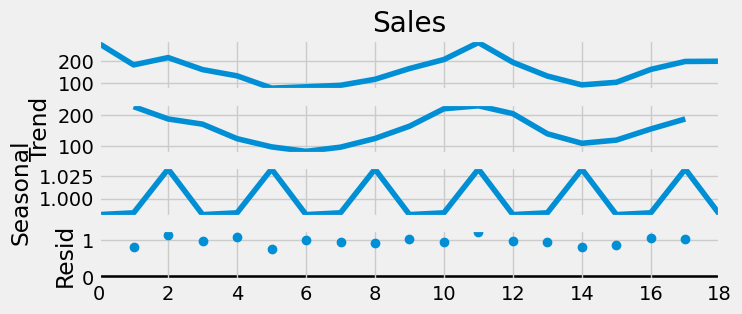

In [ ]:
# Sales of Children Footwear is affected by season, so ARIMA model might not suitable, but we will check using graphic
result = seasonal_decompose(data["Sales"], model='multiplicative', period=3)
fig= plt.figure()
fig=result.plot()
fig.set_size_inches(8,3)

In [ ]:
# So, we need to use Seasonal ARIMA/ SARIMA, d = 1 (d for seasonal =1). We need to find value for p and q.
# p value is determined using plot autocorellation

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

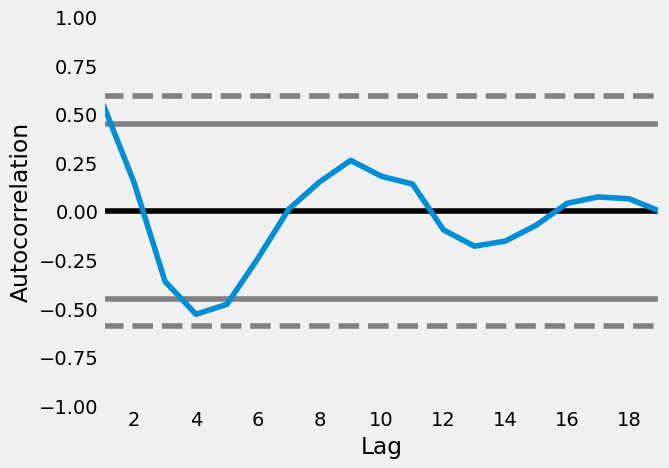

In [ ]:
pd.plotting.autocorrelation_plot(data['Sales'])

In [ ]:
# because from the plot autocorrelation the graphic intersect with 3 lines, the p value =3

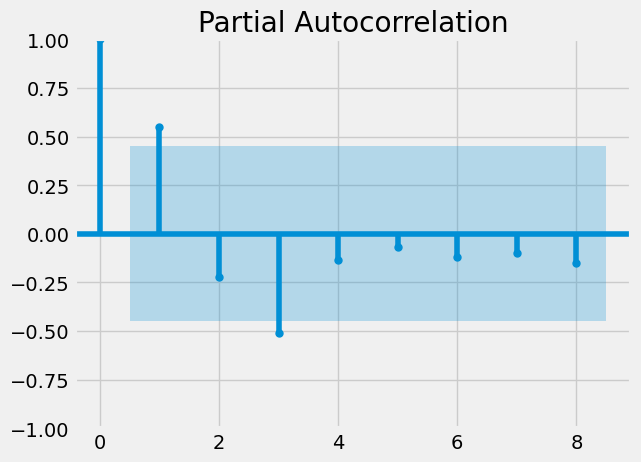

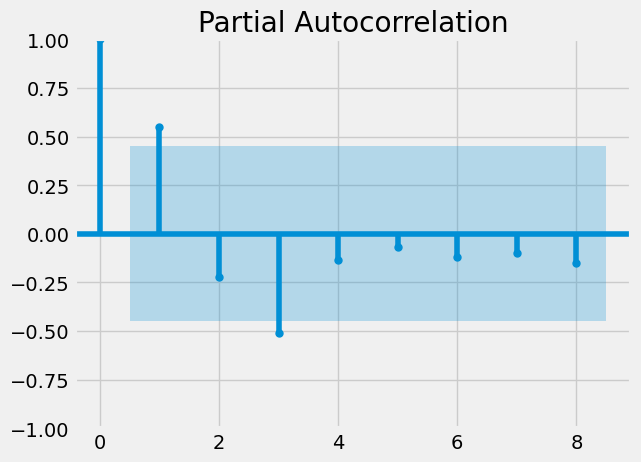

In [ ]:
# q value is determined with autocorrelation partial
plot_pacf(data['Sales'], lags=8)

In [ ]:
d=1
p=3
q=2

In [ ]:
# Start Making the Model

In [ ]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore',ConvergenceWarning)
model=sm.tsa.statespace.SARIMAX(data['Sales'],
                               order=(p,d,q),
                               seasonal_order=(p,d,q,12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   19
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                 -33.286
Date:                            Tue, 06 Aug 2024   AIC                             88.572
Time:                                    08:11:44   BIC                             86.281
Sample:                                         0   HQIC                            79.402
                                             - 19                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0336     73.003     -0.014      0.989    -144.117     142.050
ar.L2         -0.1392    132.807   

In [ ]:
# Now we can use the model to make a sales prediction for the next 6 months

In [ ]:
prediction=model.predict(len(data), len(data)+5)
print(prediction)

19    239.798710
20    245.917797
21    313.421629
22    339.640935
23    434.077044
24    320.178373
Name: predicted_mean, dtype: float64


In [ ]:
# Make the graphic of the prediction

<Axes: >

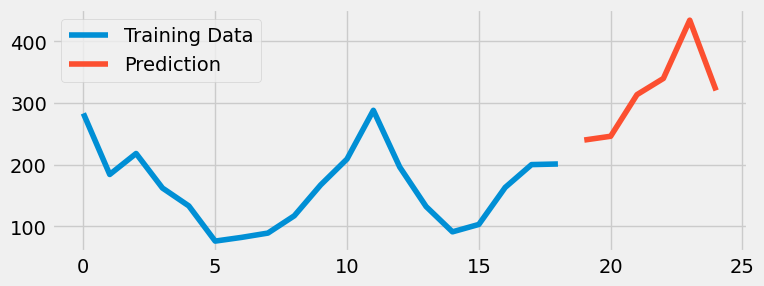

In [ ]:
data['Sales'].plot(legend=True,
                   label="Training Data",
                   figsize=(8,3))
prediction.plot(legend=True,
                label="Prediction")